In [1]:
from samana.Data.wfi2033 import WFI2033_NIRCAM, WFI2033_HST
from samana.Model.wfi2033_model_nircam import WFI2033NircamModelEPLM3M4Shear
import numpy as np
import h5py
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Data.coord_transforms import Coordinates

In [2]:
data = WFI2033_NIRCAM(1, psf_supersampling_convolution=True)
model = WFI2033NircamModelEPLM3M4Shear(data, shapelets_order=24)
kwargs_lens_macro_init = None
kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)

fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  model.kwargs_likelihood, kwargs_params)

nthreads = 10
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a','a1_a','delta_phi_m1','delta_phi_m3','delta_phi_m4'], [0.0, 0.0,0.0, 0.0, 0.0,0.0]]]}],
       #['update_settings', {'source_add_fixed': [[1, ['beta'], [0.08]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 20, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 50, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 20, 'n_run': 20, 'walkerRatio': 2, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Sampling/Likelihoods/position_likelihood.py:64: UserWarning: source_position_tolerance has been set but source_position_likelihood is False. 
In order to use the source_position_tolerance, set source_position_likelihood to True
  warnings.warn(


Computing the PSO ...


  0%|                                                                                                                                                                | 0/100 [00:00<?, ?it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman

Max iteration reached! Stopping.
-1.2735575631216831 reduced X^2 of best position
-10855.167889267666 log likelihood
17047 effective number of data points
[{'theta_E': 1.012926776804741, 'gamma': 1.8608190160445175, 'e1': -0.03615549168222424, 'e2': 0.08791475212770804, 'center_x': -0.014103073185207173, 'center_y': -0.004729845703446812, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.13226216068488378, 'gamma2': -0.028670109956634434, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.0533278449647389, 'center_x': 0.24079469432043996, 'center_y': 2.042014524489884}, {'theta_E': 0.7885740332694505, 'center_x': -3.7281984229782643, 'center_y': -0.4301546015148287}] lens result
[{'amp': 1, 'R_sersic': 0.9955337722000838, 'n_sersic': 0.8596792463334929, 'e1': -0.043970565736066176, 'e2': 0.11659298062181901, 'center_x': -0.6381891174041231, 'center_y': -0.019244561641221992}, {'amp': 1, 'n_max': 24, 'beta': 0.07456133744586524, '


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


-1.246140717548856 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.246140717548856
(38, ['gamma_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'theta_E_lens3', 'center_x_lens3', 'center_y_lens3', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1', 'n_sersic_lens_light1', 'e1_lens_light1', 'e2_lens_light1', 'R_sersic_lens_light2', 'n_sersic_lens_light2', 'center_x_lens_light2', 'center_y_lens_light2', 'R_sersic_lens_light3', 'n_sersic_lens_light3', 'center_x_lens_light3', 'center_y_lens_light3', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


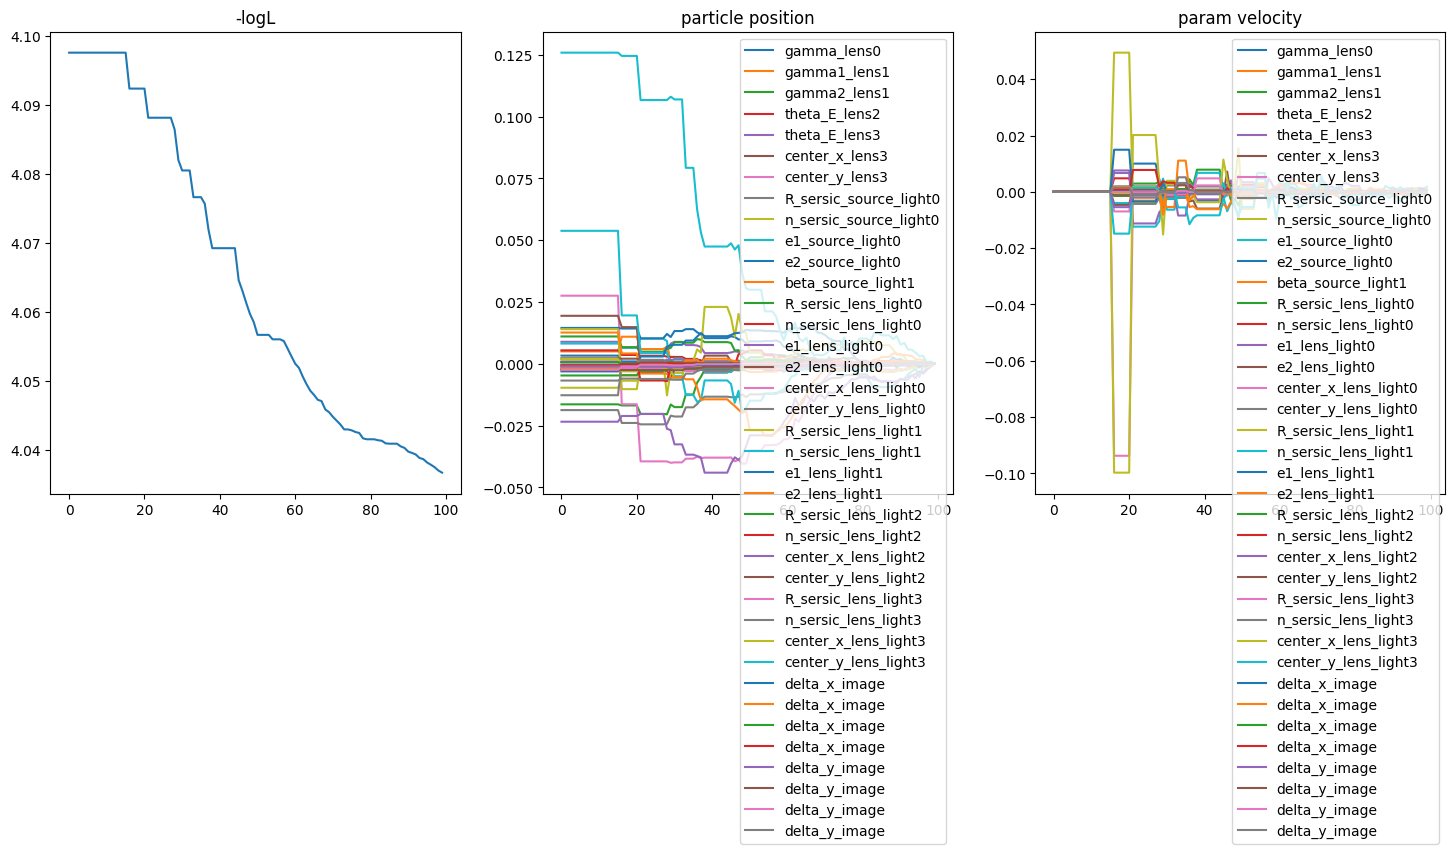

<Figure size 640x480 with 0 Axes>

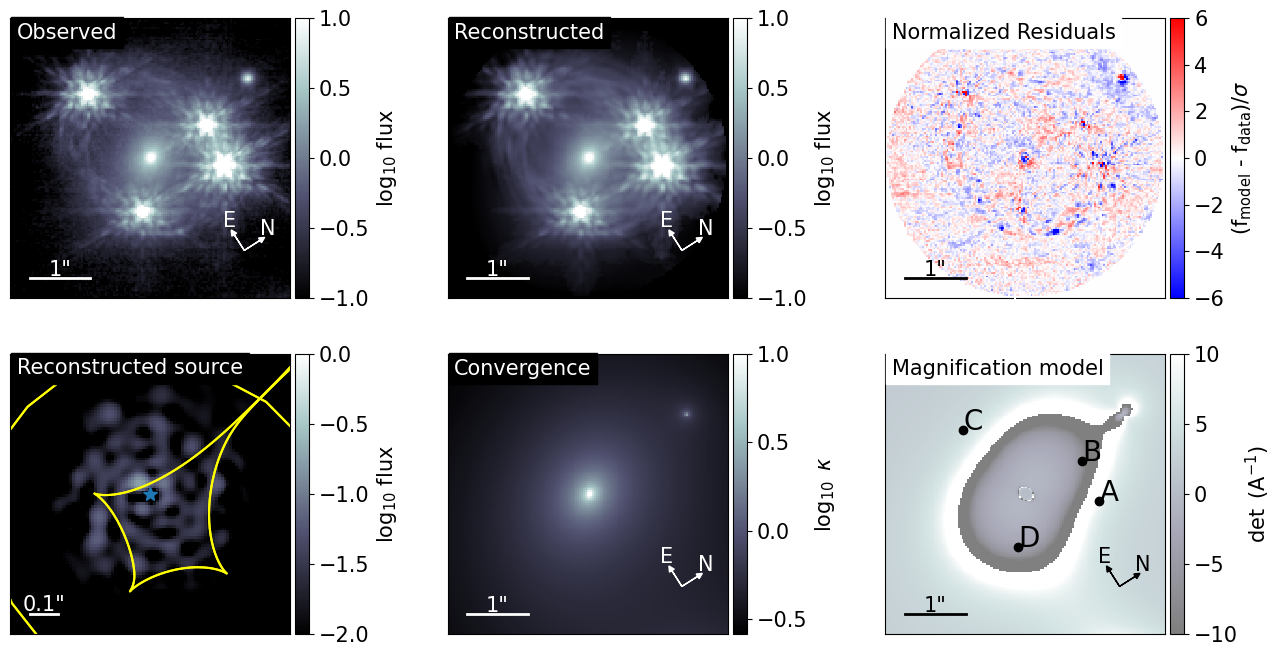

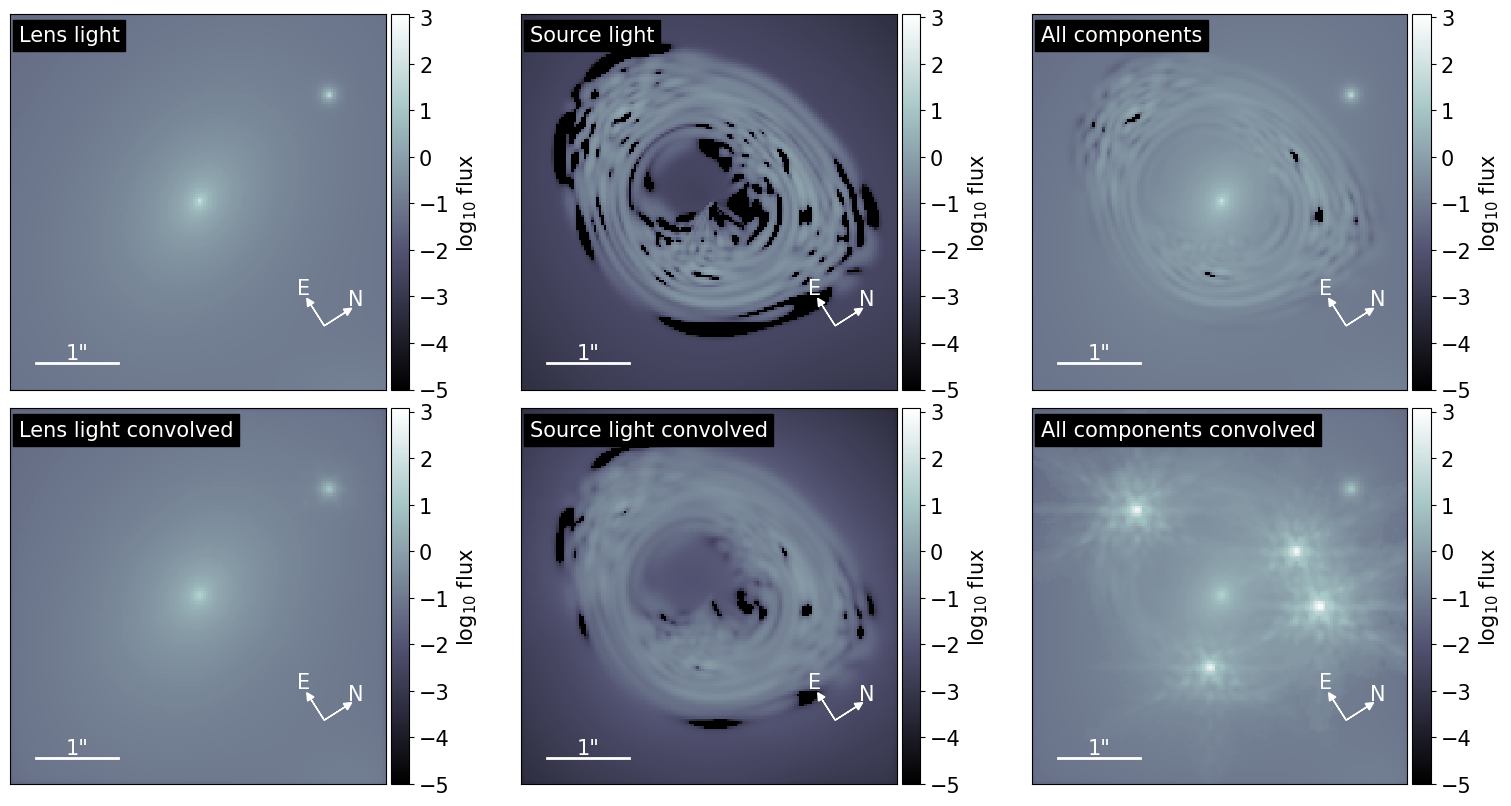

{'kwargs_lens': [{'theta_E': 1.012926776804741, 'gamma': 1.8608190160445175, 'e1': -0.03615549168222424, 'e2': 0.08791475212770804, 'center_x': -0.014103073185207173, 'center_y': -0.004729845703446812, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.13226216068488378, 'gamma2': -0.028670109956634434, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.0533278449647389, 'center_x': 0.24079469432043996, 'center_y': 2.042014524489884}, {'theta_E': 0.7885740332694505, 'center_x': -3.7281984229782643, 'center_y': -0.4301546015148287}], 'kwargs_source': [{'amp': 2.255263835687958, 'R_sersic': 0.9955337722000838, 'n_sersic': 0.8596792463334929, 'e1': -0.043970565736066176, 'e2': 0.11659298062181901, 'center_x': -0.6381891174041231, 'center_y': -0.019244561641221992}, {'amp': array([ 1.17585419e+03,  3.46096676e+02,  4.29492737e+01,  5.93955962e+02,
       -1.15353335e+02,  4.75142154e+02, -1.45468068e+02, -1.26890133e+02,
       -1.491

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


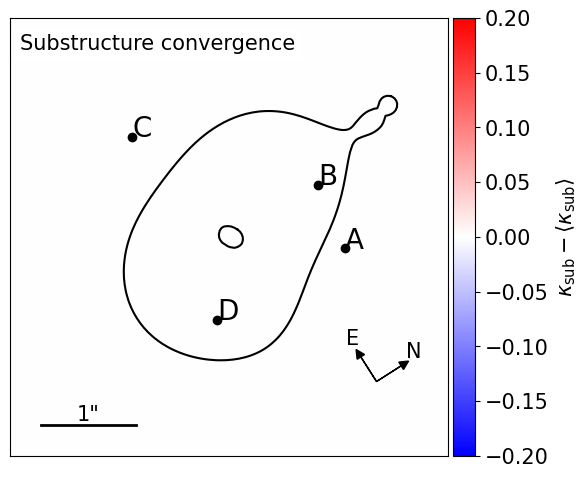

In [3]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

from palettable.scientific.diverging import Vik_20 as cmap
cmap = cmap.get_mpl_colormap()

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0], v_min=-1., v_max=1)
modelPlot.model_plot(ax=axes[0,1], v_min=-1., v_max=1)
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
vmin = -2
vmax = vmin + 2
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, 
                      numPix=100, v_min=vmin, v_max=vmax, with_caustics=True)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = plt.subplot(111)
kwargs_plot = {'ax': ax,
               'index_macromodel': [0, 1,2,3], 
              'with_critical_curves': True,
              'v_min': -0.2,'v_max': 0.2}
modelPlot.substructure_plot(band_index=0, **kwargs_plot)
print(kwargs_result)
#print(kwargs_result['kwargs_lens'])
#print(kwargs_result['kwargs_lens_light'])


-1.246140717548856 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.246140717548856


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


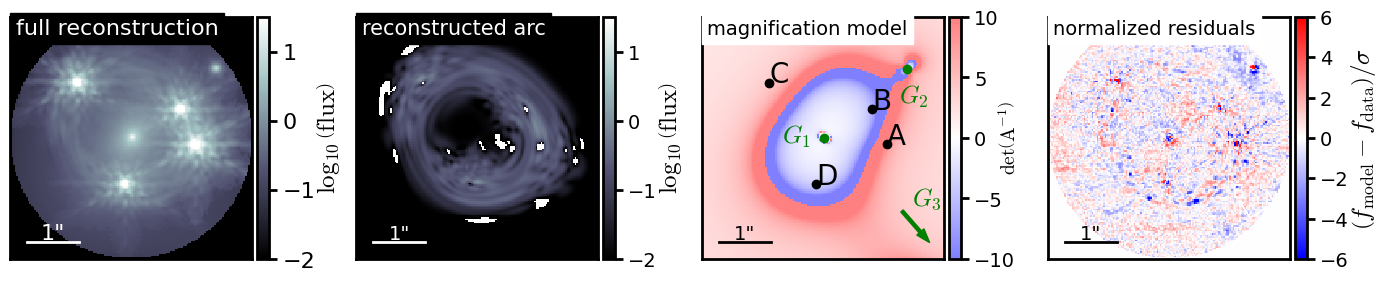

In [4]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -2
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, lens_light_add=False, 
                             v_min=v_min, v_max=v_max,cmap='bone',font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_-0.8, y_-0.1, r'$G_1$', fontsize=18, color='g')

satx = kwargs_result['kwargs_lens'][2]['center_x']
saty = kwargs_result['kwargs_lens'][2]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_-0.16, y_-0.65, r'$G_2$', fontsize=18, color='g')

ax3.text(4., 1, r'$G_3$', fontsize=18, color='g')
ax3.arrow(3.8, 0.9, 0.35, -0.4,color='g',width=0.06)

ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/2033bmodel.pdf',bbox_inches='tight')

In [5]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
logL_list = []
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )
for i in range(0, 10000):
    poisson = image_util.add_poisson(image_sim_no_noise, exp_time=data.kwargs_data['exposure_time'])
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=data.kwargs_data['background_rms'])
    noise_map = bkg + poisson
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) - max_logL
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'